# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

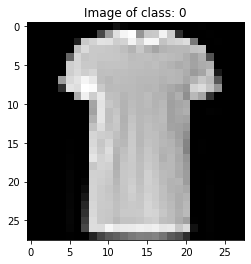

In [3]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [4]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [5]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [6]:
train_loader = torch.utils.data.DataLoader(training_data, 100, True)
test_loader = torch.utils.data.DataLoader(test_data, 100, True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Task 2:

Create a Neural Network

In [7]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)

# Task 3:

Specify loss and optimizer

In [8]:
learning_rate = 0.001
error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Task 3:

Train model using for loop

In [9]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    print("Epoch ", epoch)
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
        train = Variable(images.view(images.shape[0], -1))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
        count += 1
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(images.shape[0], -1))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 100):
            print("Iteration: {}, Loss: {:.3f}, Accuracy: {:.3f}".format(count, loss.data, accuracy))

Epoch  0
Iteration: 100, Loss: 0.763, Accuracy: 0.723
Iteration: 200, Loss: 0.625, Accuracy: 0.776
Iteration: 300, Loss: 0.709, Accuracy: 0.796
Iteration: 400, Loss: 0.348, Accuracy: 0.811
Iteration: 500, Loss: 0.548, Accuracy: 0.821
Iteration: 600, Loss: 0.670, Accuracy: 0.824
Epoch  1
Iteration: 700, Loss: 0.438, Accuracy: 0.829
Iteration: 800, Loss: 0.465, Accuracy: 0.831
Iteration: 900, Loss: 0.541, Accuracy: 0.837
Iteration: 1000, Loss: 0.399, Accuracy: 0.844
Iteration: 1100, Loss: 0.394, Accuracy: 0.815
Iteration: 1200, Loss: 0.281, Accuracy: 0.831
Epoch  2
Iteration: 1300, Loss: 0.485, Accuracy: 0.839
Iteration: 1400, Loss: 0.367, Accuracy: 0.846
Iteration: 1500, Loss: 0.556, Accuracy: 0.839
Iteration: 1600, Loss: 0.343, Accuracy: 0.850
Iteration: 1700, Loss: 0.385, Accuracy: 0.851
Iteration: 1800, Loss: 0.521, Accuracy: 0.857
Epoch  3
Iteration: 1900, Loss: 0.249, Accuracy: 0.840
Iteration: 2000, Loss: 0.327, Accuracy: 0.853
Iteration: 2100, Loss: 0.310, Accuracy: 0.843
Iterati

# Task 4:

Report accuracy from train set, and test set independently

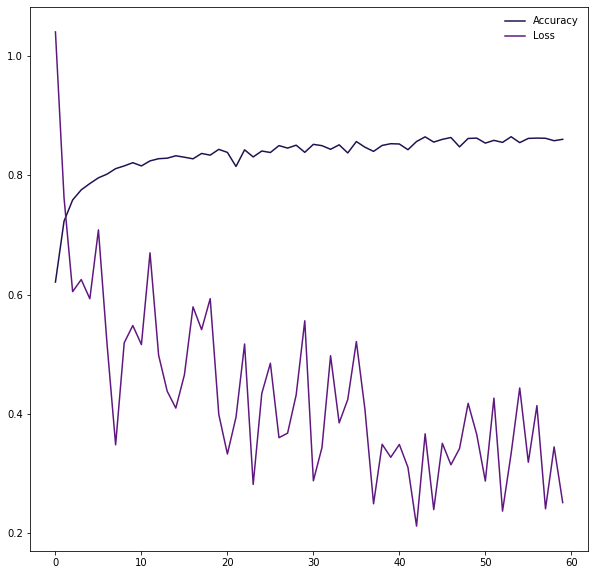

In [10]:
sns.set_palette("magma")
fig = plt.figure(figsize=(10, 10))
plt.plot(accuracy_list, label = "Accuracy")
plt.plot(loss_list, label = "Loss")
plt.legend(frameon = False)

In [11]:
preds_test = torch.tensor([])
vals_test  = torch.tensor([])
correct = 0
with torch.no_grad():
    for X, y in test_loader:
        X = X.view(-1, 784)
        out = model.forward(X)
        _, preds = torch.max(out, dim=1)
        correct += (preds == y).float().sum()
        preds_test = torch.cat((preds_test, model.forward(X)), 0)
        vals_test  = torch.cat((vals_test , y), 0)
test_acc = correct / len(test_data)
print("Accuracy on a test set: {:.3f}%".format(100*test_acc))

Accuracy on a test set: 85.510%


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [13]:

_, preds = torch.max(preds_test, dim=1)
conf_matrix = confusion_matrix(vals_test.numpy(), preds.numpy())

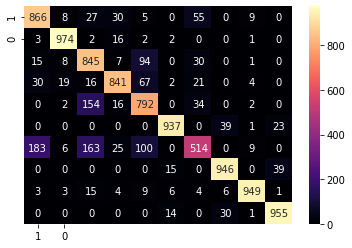

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt="d", yticklabels=[1, 0], xticklabels=[1, 0], cmap="magma")
plt.show()

In [15]:
def view_classify(img, ps, version="MNIST"):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

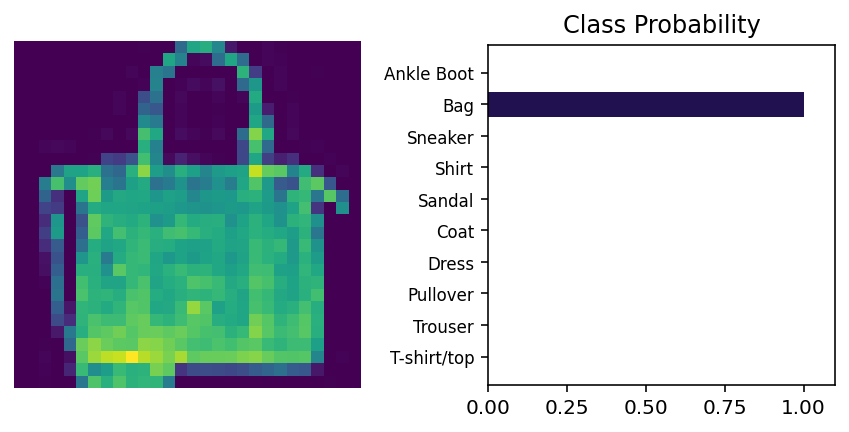

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Testing out the network
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [17]:
from sklearn.linear_model import LogisticRegression

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

lr = LogisticRegression()
lr.fit(train, train_labels)

predicts = lr.predict(test)
acurracy = (predicts == test_labels).sum() / len(predicts)
print("Logistic Regression Accuracy: {:.3f}%".format(100*acurracy))

Logistic Regression Accuracy: 84.120%


c:\users\пользователь\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.tree import DecisionTreeClassifier

train = training_data.data.numpy()
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

dt = DecisionTreeClassifier()
dt.fit(train, train_labels)

predicts = dt.predict(test)
acurracy = (predicts == test_labels).sum() / len(predicts)
print("Decision Tree Accuracy: {:.3f}%".format(100*acurracy))

Decision Tree Accuracy: 78.870%
